Nama : Risma Faoziya

Email : rismafaoziya@gmail.com

Alamat : RT.01/04,Desa Sarwadadi,Kec.Kawunganten,Kab.Cilacap, Jawa Tengah

Instansi : Universitas Diponegoro

# **Hand Image classification using CNN (Convolutional Neural Network).**

This model classify hand image into 3 classes are rock, paper, and scissors. I used categorical crossentropy as the loss function, Adam as the optimizer, and accuracy as the metric. The model performed well and did not overfit, achieving 98.5% accuracy for train data and 98.75% accuracy for test data.

In [ ]:
# Bagian import library python untuk machine learning
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# menginstal split_folders
!pip install split_folders

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-26 12:01:19--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.66MB/s    in 77s     

2021-07-26 12:02:37 (4.01 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()


In [ ]:
# Mengecek isi dari direktori rockpaperscissors
os.listdir('/tmp/rockpaperscissors')

['rps-cv-images',
 'scissors',
 'rock',
 'val',
 'README_rpc-cv-images.txt',
 'train',
 'paper']

In [ ]:
# Mengecek isi dari direktori __MACOSX
os.listdir('/tmp/__MACOSX')

['._rockpaperscissors', 'rockpaperscissors']

In [ ]:
# Mengcopy file data dari dan dikelompokan menjadi beberapa kelompok yaitu base_directory,train directory,dan validation_directory
import splitfolders
base_directory = '/tmp/rockpaperscissors/rps-cv-images'
splitfolders.ratio(base_directory,output='/tmp/rockpaperscissors',seed=1337,ratio=(0.6,0.4))

train_directory = os.path.join('/tmp/rockpaperscissors', 'train')
validation_directory = os.path.join('/tmp/rockpaperscissors', 'val')

Copying files: 2188 files [00:00, 3410.99 files/s]


In [ ]:
# Memecah base_directory menjadi 3 sub direktori yaitu rock_directory,paper_directory,scissors_directory

#1. paper_directory : merupakan sub direktori yang mana merupakan klasifikasi gambar jari tangan berbentuk kertas (aksi jari tangan terlentang)
paper_directory = os.path.join(base_directory, 'paper')

#2. rock_directory : merupakan sub direktori yang mana merupakan klasifikasi gambar jari tangan berbentuk batu (aksi jari tangan mengepal)
rock_directory = os.path.join(base_directory, 'rock')

#3. scissors_directory : merupakan sub direktori yang mana merupakan klasifikasi gambar tangan berbentuk gunting (aksi jari tangan telunjuk dan tengah berbentuk huruf v dan jari selainnya melungkup )
scissors_directory = os.path.join(base_directory, 'scissors')

In [ ]:
# Memecah sub direktori paper menjadi data train (data pelatihan) dan data validasi (data pengujian) dengan test_size = 0.4, train_size = 0.6
train_paper_directory,validation_paper_directory = train_test_split(os.listdir(paper_directory),test_size = 0.4, train_size = 0.6)

# Memecah sub direktori rock menjadi data train (data pelatihan) dan data validasi (data pengujian) dengan test_size = 0.4, train_size = 0.6
train_rock_directory,validation_rock_directory = train_test_split(os.listdir(rock_directory),test_size = 0.4, train_size = 0.6)

# Memecah sub direktori scissors menjadi data train (data pelatihan) dan data validasi (data pengujian) dengan test_size = 0.4, train_size = 0.6
train_scissors_directory,validation_scissors_directory = train_test_split(os.listdir(scissors_directory),test_size = 0.4, train_size = 0.6)

In [ ]:
# membuat direktori tangan paper untuk train process pada direktori data training
train_paper = os.path.join(train_directory, 'paper')

# membuat direktori tangan rock untuk train process pada direktori data training
train_rock = os.path.join(train_directory, 'rock')

# membuat direktori tangan scissors untuk train process pada direktori data training
train_scissors= os.path.join(train_directory, 'scissors')

# membuat direktori tangan paper untuk validation process pada direktori data validasi
validation_paper = os.path.join(validation_directory, 'paper')

# membuat direktori tangan rock untuk validation process pada direktori data validasi
validation_rock = os.path.join(validation_directory, 'rock')

# membuat direktori tangan scissors untuk validation process pada direktori data validasi
validation_scissors = os.path.join(validation_directory, 'scissors')

In [ ]:
# Membagi datagen menjadi train datagen(untuk pelatihan) dan test datagen(untuk pengujian)
# train datagen
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
# test_datagen
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
# Membagi datagen menjadi train generator(untuk pelatihan) dan test generator(untuk pengujian)
# train_generator
train_generator = train_datagen.flow_from_directory(
        train_directory,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        class_mode='categorical')

# validation_generator
validation_generator = test_datagen.flow_from_directory(
        validation_directory, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [ ]:
# mengimplementasikan model
from keras.constraints import maxnorm
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
# memetakan model compile
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
# tahap pengujian yang mana data diuji
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
)

Epoch 1/20
25/25 [==============================] - 51s 2s/step - loss: 1.1146 - accuracy: 0.3562 - val_loss: 1.0620 - val_accuracy: 0.5000
Epoch 2/20
25/25 [==============================] - 49s 2s/step - loss: 0.8355 - accuracy: 0.6800 - val_loss: 0.6298 - val_accuracy: 0.7312
Epoch 3/20
25/25 [==============================] - 49s 2s/step - loss: 0.4027 - accuracy: 0.8525 - val_loss: 0.2479 - val_accuracy: 0.9187
Epoch 4/20
25/25 [==============================] - 49s 2s/step - loss: 0.2457 - accuracy: 0.9112 - val_loss: 0.2538 - val_accuracy: 0.9187
Epoch 5/20
25/25 [==============================] - 49s 2s/step - loss: 0.2253 - accuracy: 0.9200 - val_loss: 0.1893 - val_accuracy: 0.9375
Epoch 6/20
25/25 [==============================] - 49s 2s/step - loss: 0.1845 - accuracy: 0.9438 - val_loss: 0.2393 - val_accuracy: 0.9438
Epoch 7/20
25/25 [==============================] - 49s 2s/step - loss: 0.1550 - accuracy: 0.9488 - val_loss: 0.3734 - val_accuracy: 0.9125
Epoch 8/20
25/25 [==

Saving 1CXgK9fgGdSRggD9.png to 1CXgK9fgGdSRggD9 (1).png
1CXgK9fgGdSRggD9.png
Scissors Shape


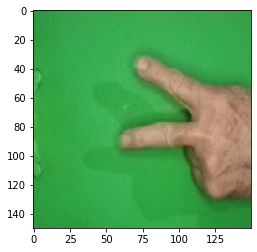

In [ ]:
# Menginput gambar untuk diuji klasifikasi bentuk tangannya
# Mengimpor beberapa library untuk keperluan meninput dan memproses gambar untuk klasifikasi gambar tangan
import numpy as np
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
%matplotlib inline

uploaded = files.upload()

for j in uploaded.keys():

  # predicting images
  path = j
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(j)
  if classes[0][0]==1: # Jika gambar dengan kelas dengan posisi bagian matriks [0][0]==1 maka gambar tersebut tergolong tangan dengan bentuk paper (aksi jari tangan terlentang)
    print('Paper Shape')
  elif classes[0][1]==1:# Jika gambar dengan kelas dengan posisi bagian matriks [0][2]==1 maka gambar tersebut tergolong tangan dengan bentuk rock(batu) (aksi jari tangan menggenggam)
    print('Rock Shape')
  elif classes[0][2]==1: # Jika gambar dengan kelas dengan posisi bagian matriks [0][3]==1 maka gambar tersebut tergolong tangan dengan bentuk scissors (gunting) (aksi jari tangan telunjuk dan tengah berbentuk huruf v dan jari selainnya melungkup)
    print('Scissors Shape')
  else : # Jika gambar dengan kelas dengan posisi bagian matriks [0][3]==1 maka gambar tersebut tergolong tangan dengan bentuk scissors (gunting) (aksi jari tangan telunjuk dan tengah berbentuk huruf v dan jari selainnya melungkup)
    print('Abstract Shape')
